# Setup

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import multiprocessing as mp
import pickle
from itertools import repeat
from collections import defaultdict
from functools import partial
from skimage import io, restoration, img_as_uint, transform, feature, img_as_float
from scipy.ndimage import gaussian_filter
from scipy import interpolate
from metadata import *
from hybescope_config.microscope_config import *
from seqfish_config_Inflammation import *
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['GOTO_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
!pip install -e /home/zach/Documents/PySpots/
!pip install -e /home/zach/Documents/PyImages/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Obtaining file:///home/zach/Documents/PySpots
  Found existing installation: pyspots 0.1
    Uninstalling pyspots-0.1:
      Successfully uninstalled pyspots-0.1
  Running setup.py develop for pyspots
Obtaining file:///home/zach/Documents/PyImages
  Found existing installation: pyimages 0.1
    Uninstalling pyimages-0.1:
      Successfully uninstalled pyimages-0.1
  Running setup.py develop for pyimages


# Setup Output Path

In [ ]:
import os
Name = 'Zach'
Project = 'FISH_Troubleshooting'
Dataset = 'Transverse_Second_2018Aug24'
image_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/'
project_path = os.path.join('/hybedata',Name,Project,Dataset)
analysis_path = os.path.join(project_path,'Analysis')
deconvolved_path = os.path.join(analysis_path,'deconvolved')
bead_path = os.path.join(analysis_path,'beads')
codestacks_path = os.path.join(analysis_path,'codestacks')
results_path = os.path.join(analysis_path,'results')
if not os.path.exists(analysis_path):
        os.makedirs(analysis_path)
if not os.path.exists(deconvolved_path):
        os.makedirs(deconvolved_path)
if not os.path.exists(bead_path):
        os.makedirs(bead_path)
if not os.path.exists(codestacks_path):
        os.makedirs(codestacks_path)
if not os.path.exists(results_path):
        os.makedirs(results_path)

# New Analysis Pipeline

Find beads

In [ ]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/find_beads.py'
image_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/'
analysis_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis'
#!python {analysis_file} {image_path} {analysis_path}
!python '/home/zach/Documents/PySpots/analysis_scripts/find_beads.py' '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis'

In [127]:
beads = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl','rb'))

Find Transformations

In [ ]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/find_tforms_by_optimization.py'
image_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/'
bead_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl'
results_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results'
#!python {analysis_file} {image_path} {bead_path} {results_path} -p 12 
!python '/home/zach/Documents/PySpots/analysis_scripts/find_tforms_by_optimization.py' '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results' -p 12 

In [5]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/find_tforms.py'
bead_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl'
out_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl'
#!python {analysis_file} {bead_path} {out_path}
!python '/home/zach/Documents/PySpots/analysis_scripts/find_tforms.py' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl'

Namespace(bead_path='/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl', max_thresh=1.5, ncpu=4, out_path='/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl')
0
0.3488485680485803
0.37897482866399174
0.4459201304643127
0.30931549339267506
0.25779052822153464
0.21373374767649128
0.307038152822914
0.28916483431848966
Pos0 all good
0
0.2990602142189572
0.3441091716387079
0.3269308112472838
0.3909354574453442
0.2541560462209415
0.2833278266230745
0.25410996478062964
0.256697729059613
Pos1 all good
0
0.3429088115716741
0.35037709760583025
0.26842830441403426
0.25471099761525495
0.29191549455417476
0.272721011756651
0.3217591288695942
0.344364768522316
Pos2 all good
0
0.3119948818923196
0.43030961767983483
0.2215670072592715
0.33335087946678826
0.2400923390872894
0.3311406145741322
0.20216185202478557
0.1976369569461652
Pos3 all good
0
0.3411246560240281
0.41455416168113435
0.30094677013049026
0.33574722318053

0
0.25911211985399035
0.2245771784034379
0.2889271088005135
0.27466771564655407
0.2449869846804819
0.3743277496193922
0.4345076853921694
0.2814336080701292
Pos49 all good
0
0.3598909017348681
0.28235928469676397
0.28810460865203047
0.38571402867533877
0.28485877734498666
0.38556868337890854
0.3023928929046599
0.2735730252709691
Pos50 all good
0
0.3515863760450777
0.28674212933685134
0.23233901933540893
0.3067941010804939
0.2917470460611671
0.35160017574722324
0.3051732377804886
0.3598322724667284
Pos51 all good
0
0.4203418132417495
0.36372245523334545
0.29335976501901107
0.3787086865201635
0.31008349465773233
0.34739538281187504
0.33795917784282914
0.27235674563841994
Pos52 all good
0
0.25622606195255265
0.3554049131757449
0.349496260939289
0.21810011084899572
0.22851894162789627
0.320991775671667
0.3832392028222936
0.21067190511275993
Pos53 all good
0
0.3246513308073727
0.31203630168175905
0.17659052384255425
0.33322065160797754
0.27636245851965374
0.29088800745666116
0.36793181069380

In [122]:
tforms = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl','rb'))

Create Deconvolved Codestacks

In [6]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/decon_codestacks.py'
image_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/'
codeword_config = 'seqfish_config_Inflammation'
tforms_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl'
out_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/'
#!python {analysis_file} {image_path} {codeword_conifg} {tforms_path} {out_path} -k 1 -s 2 -m 45 -i 3 --decon_iters 25
!python '/home/zach/Documents/PySpots/analysis_scripts/decon_codestacks.py' '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/' 'seqfish_config_Inflammation' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/' -p 16 -k 1 -s 2 -m 45 -i 3 --decon_iters 25

Namespace(cword_config='seqfish_config_Inflammation', k=1, md_path='/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/', ncpu=16, niter=25, out_path='/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/', tforms_path='/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl', zmax=45, zskip=3, zstart=2)
^C
Process ForkPoolWorker-15:
Process ForkPoolWorker-10:
Process ForkPoolWorker-9:
Process ForkPoolWorker-16:
Process ForkPoolWorker-11:
Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Process ForkPoolWorker-13:
Process ForkPoolWorker-6:
Process ForkPoolWorker-4:
Process ForkPoolWorker-12:
Process ForkPoolWorker-8:
Process ForkPoolWorker-3:
Process ForkPoolWorker-14:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Tr

Classify Codestacks

In [28]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py'
codestack_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks'
codeword_config = 'seqfish_config_Inflammation'
#!python {analysis_file} {codestack_path} {codeword_config}
!python '/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks' 'seqfish_config_Inflammation' -p 16 -r 85

Namespace(cstk_path='/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks_npz', cword_config='seqfish_config_Inflammation', ncpu=8, niter=10, nrandom=50)
N Positions left:  50
Traceback (most recent call last):
  File "/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py", line 211, in <module>
    cur_nf = np.array(np.nanmean([mean_nfs_npz(c) for c in codestacks], axis=0))
  File "/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py", line 211, in <listcomp>
    cur_nf = np.array(np.nanmean([mean_nfs_npz(c) for c in codestacks], axis=0))
  File "/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py", line 35, in mean_nfs_npz
    data = np.load(fname)
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/lib/npyio.py", line 414, in load
    pickle_kwargs=pickle_kwargs)
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/lib/npyio.py

In [17]:
from analysis_scripts.HybeData import *
codestack_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks'
posnames = os.listdir(codestack_path)
pos = posnames[0]
pos_path = os.path.join(codestack_path,pos)
hdata = HybeData(pos_path)
z = hdata.metadata.zindex.unique()[0]
cstk = hdata.load_data(pos,z, 'cstk')
cimg = hdata.load_data(pos,z, 'cimg')
nf = hdata.load_data(pos, z, 'nf')

In [36]:
test_data = HybeData(codestack_path)

In [39]:
nf

array([312.5633194 , 314.83153229, 324.18969116, 304.15026093,
       309.8125946 , 313.41444092, 212.50914078, 220.80970917,
       226.93678665, 213.04175644, 225.66835556, 212.26466141,
       312.08552856, 320.96959534, 309.75939026, 228.65283127,
       214.13679428, 235.86747284])

# Old Pipeline

Deconvolution

In [23]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/image_process_queue.py'
image_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/'
deconvolved_path = '/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/deconvolved'
#!python {analysis_file} {image_path} {deconvolved_path} -p 32

  File "/home/zach/Documents/PySpots/analysis_scripts/image_process_queue.py", line 120
    return = process_image_postimaging(fname)
           ^
SyntaxError: invalid syntax


Find Beads

In [ ]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/find_beads.py'
image_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/'
analysis_path = '/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis'
!python {analysis_file} {image_path} {analysis_path}

Find Transformations

In [6]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/find_tforms_by_optimization.py'
image_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/'
results_path = '/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results'
bead_path = '/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl'
!python {analysis_file} {image_path} {bead_path} {results_path} -p 12 

Namespace(bead_path='/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl', md_path='/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/', ncpu=[12], out_path='/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results')
opening img_Pos4_000000052_000000000_DeepBlue_000_052.tiffmultiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/zach/miniconda3/envs/pyspots/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/home/zach/Documents/PySpots/analysis_scripts/find_tforms_by_optimization.py", line 68, in wrappadappa_bead_xcorr
    bead_projections = hybe_composite(md_pth, posname, channels=['DeepBlue'], zindexes=None, nhybes=9)
  File "/home/zach/Documents/PySpots/analysis_scrip

Create Codestacks

In [ ]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/create_codestacks.py'
deconvolved_path = '/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/deconvolved'
codeword_config = 'seqfish_config_zach'
codestacks_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks'
!python {analysis_file} {deconvolved_path} {codeword_config} {os.path.join(results_path,'tforms.pkl')} {codestacks_path} -p 8

Classify Codestacks

In [1]:
analysis_file = '/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py'
codestack_path = '/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks_new'
codeword_config = 'seqfish_config_Inflammation'
!python {analysis_file} {codestack_path} {codeword_config} -p 16

Namespace(cstk_path='/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks_new', cword_config='seqfish_config_Inflammation', ncpu=16, niter=10, nrandom=50)
Traceback (most recent call last):
  File "/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py", line 203, in <module>
    codestacks = list(np.random.choice(codestacks, size=args.nrandom, replace=False))
  File "mtrand.pyx", line 1126, in mtrand.RandomState.choice
ValueError: a must be non-empty


# Workbook

In [5]:
def unix_find(pathin):
    """Return results similar to the Unix find command run without options
    i.e. traverse a directory tree and return all the file paths
    """
    
    return [os.path.join(path, file)
            for (path, dirs, files) in os.walk(pathin)
            for file in files]
path = '/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/'
filez = unix_find(path)
codestacks = defaultdict(dict)
Pos = []
for f in filez:
    pos = f.split('/')[-1]
    pos = pos.split('.')[0]
    Pos.append(pos)
    print(pos)
    codestacks[pos] = np.load(f)

In [ ]:
    filez = unix_find(codestacks_path)
    Pos = []
    for f in filez:
        pos = f.split('/')[-1]
        pos = pos.split('.')[0]
        print(pos)
        Pos.append(pos)
    for p, (t, q) in good_positions.items(args.out_path):
        if p in Pos:
            continue
        tforms_xyz = {k: (v[0], v[1], int(np.round(np.mean(v[2])))) for k, v in t.items()}
        txy = {k: (v[0], v[1]) for k, v in tforms_xyz.items()}
        tzz = {k: v[2] for k, v in tforms_xyz.items()}
        func_inputs.append((p, txy, tzz))
    with multiprocessing.Pool(args.ncpu) as ppool:
        ppool.starmap(pfunc, func_inputs)

In [ ]:
python '/home/zach/Documents/PySpots/analysis_scripts/decon_codestacks.py' '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/' 'seqfish_config_Inflammation' '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms_new.pkl''/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/' -p 16 -k 1 -s 2 -m 50 -i 3 --decon_iters 25

In [16]:
'Pos100' in Pos

False

In [12]:
codestacks_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks'
filez = unix_find(codestacks_path)
Pos = []
for f in filez:
    pos = f.split('/')[-1]
    pos = pos.split('.')[0]
    print(pos)
    Pos.append(pos)

Pos0
Pos1
Pos2
Pos3
Pos4
Pos5
Pos6
Pos7
Pos8
Pos9
Pos10
Pos11
Pos12
Pos13
Pos14
Pos15
Pos16
Pos17
Pos18
Pos19
Pos21
Pos22
Pos23
Pos24
Pos25
Pos26
Pos27
Pos28
Pos29
Pos30
Pos31
Pos32
Pos33
Pos34
Pos35
Pos36
Pos37
Pos38
Pos39
Pos40
Pos41
Pos42
Pos43
Pos44
Pos45
Pos46
Pos47
Pos48
Pos49
Pos50
Pos51
Pos52
Pos53
Pos54
Pos55
Pos56
Pos57
Pos58
Pos59
Pos60
Pos61
Pos62
Pos63
Pos64
Pos65
Pos66
Pos67
Pos68
Pos69
Pos70
Pos71
Pos72
Pos73
Pos74
Pos75
Pos76
Pos77
Pos78
Pos79
Pos80
Pos81
Pos82
Pos83
Pos84
Pos85
Pos86
Pos87
Pos88
Pos89


In [10]:
filez

['/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos0.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos1.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos2.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos3.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos4.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos5.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos6.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos7.npz',
 '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks/Pos8.npz',
 '/bigstore/Images2018/Zach/

In [22]:
codestacks['Pos1']['cstks']

array({4: array([[[ 64, 116,  45, ...,  83,  22, 302],
        [138,  82,  20, ..., 144,  47, 228],
        [209,  90,  33, ..., 196,  85, 122],
        ...,
        [ 93,  62,  87, ...,  63,  72, 111],
        [ 62,  62,  87, ...,  63,  72, 111],
        [ 33,  62,  87, ...,  63,  72, 111]],

       [[ 64, 116,  45, ...,  83,  22, 302],
        [138,  82,  20, ..., 144,  47, 228],
        [209,  90,  33, ..., 196,  85, 122],
        ...,
        [ 93,  62,  87, ...,  63,  72, 111],
        [ 62,  62,  87, ...,  63,  72, 111],
        [ 33,  62,  87, ...,  63,  72, 111]],

       [[ 64, 116,  45, ...,  83,  22, 302],
        [138,  82,  20, ..., 144,  47, 228],
        [209,  90,  33, ..., 196,  85, 122],
        ...,
        [ 93,  62,  87, ...,  63,  72, 111],
        [ 62,  62,  87, ...,  63,  72, 111],
        [ 33,  62,  87, ...,  63,  72, 111]],

       ...,

       [[193, 134, 248, ...,  76, 130, 250],
        [223, 182, 199, ...,  78, 111, 203],
        [225, 204, 137, ..., 143

In [23]:
gene_codeword_vectors

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [7]:
from skimage.measure import regionprops, label
import pandas as pd
def parse_classification_image(class_img, cstk, cvectors, genes, zindex):
    #class_imgs = data['class_img']
    #cstk = data['cstk']
    label2d = label((class_img+1).astype('uint16'), neighbors=8)
    properties = regionprops(label2d, (class_img+1).astype('uint16'))
    areas = []
    nclasses = []
    df_rows = []
    multiclass_sets = 0
    bit_values = defaultdict(list)
    for prop in properties:
        coords = prop.coords
        centroid = prop.centroid
        classes = list(set(prop.intensity_image.flatten())-set([0]))
        #classes = list(set(list())-set([0]))
        if len(classes)==0:
            print('Label with no classes.', end='')
            pdb.set_trace()
            continue
        elif not len(classes)==1:
            #print('Labels need to be broken apart more than one classification found per label.', end='')
            #print(classes)
            pdb.set_trace()
            multiclass_sets+=1
            continue
        else:
            #different_z.append(len(set(coords[:,2])))
            nclasses.append(len(classes))
            areas.append(prop.area)
        codeword_idx = classes[0]-1
        bits = np.where(cvectors[codeword_idx]>0)[0]
        
        spot_pixel_values = []
        for x, y in coords:
            cur_vals = cstk[bits,x, y]
            spot_pixel_values+=list(cur_vals)
            for idx, b in enumerate(bits):
                bit_values[b].append(cur_vals[idx])
            #norm_spot_pixel_values = spot_pixel_values
            #norm_spot_pixel_values = nstk[x, y, bits][0]
            #pdb.set_trace()
        df_rows.append([genes[codeword_idx], centroid, spot_pixel_values,
                        np.mean(spot_pixel_values), len(coords), codeword_idx, coords])
    print(multiclass_sets)
    df = pd.DataFrame(df_rows, columns=['gene', 'centroid', 'pixel_values', 'mean', 'npixels', 'cword_idx', 'coords'])
    return df, bit_values
def multi_z_class_parse_wrapper(f, cvectors, genes):
    data = np.load(f)
    cstks, nfs, class_imgs = data['cstks'].tolist(), data['norm_factors'].tolist(), data['class_imgs'].tolist()
    merged_df =[]
    for z, cstk in cstks.items():
        df, bvs = parse_classification_image(class_imgs[z], cstk, cvectors, genes, z)
        df['z'] = z
        merged_df.append(df)
    return pd.concat(merged_df, ignore_index=True)


In [25]:
dfs = defaultdict(dict)
genes = gids
for pos in codestacks.keys():
    data = codestacks[pos]
    cstks, nfs, class_imgs = data['cstks'].tolist(), data['norm_factors'].tolist(), data['class_imgs'].tolist()
    merged_df =[]
    for z, cstk in cstks.items():
        df, bvs = parse_classification_image(class_imgs[z], cstk, cvectors, genes, z)
        df['z'] = z
        merged_df.append(df)
    dfs[pos] = merged_df

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


IndexError: index 6407 is out of bounds for axis 0 with size 176

In [26]:
dfs.keys()

dict_keys(['Pos1', 'Pos40', 'Pos44', 'Pos69', 'Pos43', 'Pos63', 'Pos82', 'Pos33', 'Pos12', 'Pos83', 'Pos15', 'Pos18', 'Pos21', 'Pos42', 'Pos76'])

In [27]:
tforms = pickle.load(open('/mnt/zachdata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl','rb'))

In [28]:
from collections import Counter
FISH_Spots = defaultdict(dict)
for pos in dfs.keys():
    if pos in tforms['good'].keys():
        for z in range(len(dfs[pos])):
            counts = Counter(dfs[pos][z].gene)
            for gene in counts.keys():
                if FISH_Spots[gene] =={}:
                    FISH_Spots[gene] = 0
                init = FISH_Spots[gene]
                new = counts[gene]
                FISH_Spots[gene] = init + new

In [29]:
FISH_Spots

defaultdict(dict,
            {'Tnfrsf1b': 1043,
             'Lamb2': 2602,
             'Casp2': 19967,
             'Ndst1': 1753,
             'Prkch': 1253,
             'Lrp6': 1179,
             'Jak2': 981,
             'Sbno2': 1154,
             'Tlr6': 31189,
             'Ahnak2': 4522,
             'Smad1': 578,
             'Tgm2': 11394,
             'Prkci': 3124,
             'Ldlr': 12428,
             'Braf': 601,
             'Pak2': 1454,
             'Aoah': 1218,
             'Vps35': 1088,
             'Camk1d': 2554,
             'P2ry2': 2156,
             'Irak2': 1289,
             'Dtx3l': 1368,
             'Myh9': 14647,
             'Clasp1': 1141,
             'Ifnar1': 379,
             'Icam1': 824,
             'Itga6': 6736,
             'Akt2': 1836,
             'Abhd2': 1560,
             'Numb': 1228,
             'Racgap1': 998,
             'Cab39l': 1121,
             'Ccnd1': 6720,
             'Tgfbr1': 1134,
             'B4galt1': 1199,
 

In [30]:
RNA_Expression = pd.read_csv('/home/zach/Downloads/Cornea Wound Gene List - Inflammation Final.csv')

In [31]:
RNA_Expression

,Gene,Description,FPKM,Length,Oligos,Gene_ID,Transcript_ID,Barcode,Isoform %,GO,Pathway,Component
0,Abhd2,abhydrolase domain containing 2 [Source:MGI Sy...,14.73,6877,120,ENSMUSG00000039202,ENSMUST00000037315,100101000000100000,99.716125,response to wounding,NaN,NaN
1,Abr,active BCR-related gene [Source:MGI Symbol;Acc...,32.48,4811,120,ENSMUSG00000017631,ENSMUST00000108407,110000000000100001,73.483374,negative regulation of inflammatory response,NaN,NaN
2,Acaca,acetyl-Coenzyme A carboxylase alpha [Source:MG...,1.91,9026,120,ENSMUSG00000020532,ENSMUST00000020843,100100001000000010,64.757850,NaN,pi3k-akt,NaN
3,Acod1,aconitate decarboxylase 1 [Source:HGNC Symbol;...,1.10,2623,120,ENSMUSG00000022126,ENSMUST00000022722,101101000000,100.000000,inflammatory response,NaN,NaN
4,Acvr1b,Activin receptor type-1B [Source:UniProtKB/Sw...,3.67,4418,120,ENSMUSG00000000532,ENSMUST00000000544,101010100000000,100.000000,NaN,mapk/erk,NaN
5,Adam8,Disintegrin and metalloproteinase domain-conta...,80.07,3100,120,ENSMUSG00000025473,ENSMUST00000026546,110000000000010100,51.713675,inflammatory response,NaN,NaN
6,Ahnak2,AHNAK nucleoprotein 2 [Source:MGI Symbol;Acc:M...,3.64,2821,120,ENSMUSG00000072812,ENSMUST00000101010,1010000001100000,62.585824,plasma membrane repair,NaN,NaN
7,Akt2,Mus musculus thymoma viral proto-onco 2 (Akt2)...,13.77,2923,120,ENSMUSG00000004056,ENSMUST00000051356,1000000010110,60.132115,NaN,TLR,NaN
8,Akt3,RAC-gamma serine/threonine-protein kinase [So...,2.26,4735,120,ENSMUSG00000019699,ENSMUST00000111160,10000010000011000,64.474982,NaN,TLR,NaN
9,Aoah,Acyloxyacyl hydrolase Acyloxyacyl hydrolase sm...,37.28,2921,120,ENSMUSG00000021322,ENSMUST00000021757,100100000000011000,88.986610,negative regulation of inflammatory response,NaN,NaN


SpearmanrResult(correlation=0.15360730473102105, pvalue=0.044870789196099214)

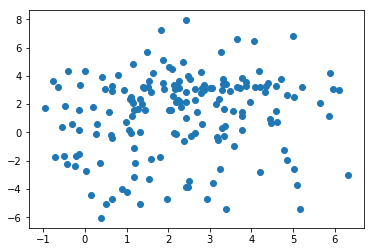

In [32]:
RNA_Expression = pd.read_csv('/home/zach/Downloads/Cornea Wound Gene List - Inflammation Final.csv')
vals = []
for gn,cc in FISH_Spots.items():
    fpkm = RNA_Expression[RNA_Expression.Gene==gn].FPKM.values
    if len(fpkm)>0:
        if cc<2:
            continue
        vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
ccs = list(np.array(ccs)/(36))
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(np.divide(ccs,3.6)))
spearmanr(np.log2(fpkms),np.log2(ccs))

In [43]:
tforms['good'].keys()

dict_keys(['Pos63', 'Pos64', 'Pos65', 'Pos66', 'Pos67', 'Pos69', 'Pos70', 'Pos71', 'Pos72', 'Pos73', 'Pos74', 'Pos76', 'Pos78', 'Pos79', 'Pos80', 'Pos88', 'Pos85', 'Pos84', 'Pos83', 'Pos82', 'Pos62', 'Pos61', 'Pos54', 'Pos53', 'Pos52', 'Pos51', 'Pos49', 'Pos46', 'Pos45', 'Pos44', 'Pos43', 'Pos42', 'Pos40', 'Pos39', 'Pos33', 'Pos32', 'Pos30', 'Pos29', 'Pos28', 'Pos27', 'Pos21', 'Pos20', 'Pos18', 'Pos15', 'Pos14', 'Pos13', 'Pos12', 'Pos11', 'Pos8', 'Pos7', 'Pos5', 'Pos1'])

In [45]:
class_imgs = defaultdict(dict)
for pos in codestacks.keys():
    class_imgs[pos] = codestacks[pos]['class_imgs'].tolist()
    print(pos)

Pos1
Pos40
Pos44
Pos69
Pos43
Pos63
Pos82
Pos33
Pos12
Pos83
Pos15
Pos18
Pos21
Pos42


KeyboardInterrupt: 

In [59]:
pos = 'Pos1'
z = 14
#codestacks[pos]['class_imgs'].tolist()[z]
cstk = codestacks[pos]['cstks'].tolist()[z]

In [24]:
%matplotlib notebook
def stkread(stk,max_percent, min_percent):
    from __future__ import print_function
    class IndexTracker(object):
        def __init__(self, ax, X):
            self.ax = ax
            ax.set_title('Image Stack') # Title

            self.X = X
            rows, cols, self.slices = X.shape
            self.ind = self.slices//2
            self.vmin = np.percentile(self.X,min_percent)
            self.vmax = np.percentile(self.X,max_percent)
            self.im = ax.imshow(self.X[:, :, self.ind], vmin=self.vmin, vmax=self.vmax)
            self.update()

        def onscroll(self, event):
            print("%s %s" % (event.button, event.step))
            if event.button == 'up':
                self.ind = (self.ind + 1) % self.slices
            else:
                self.ind = (self.ind - 1) % self.slices
            self.update()

        def update(self):
            self.im.set_data(self.X[:, :, self.ind])
            ax.set_ylabel('slice %s' % self.ind)
            self.im.axes.figure.canvas.draw()
        
        fig, ax = plt.subplots(1, 1)
        X = stk # Code Stack 3D Array
        tracker = IndexTracker(ax, X)
        fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
        plt.show()
stkread(cstk,99,1)

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-24-1e3d5da8516d>, line 3)

In [40]:
path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/codestacks'
hdata = HybeData(path)

In [42]:
hdata.load_metadata(path)

/home/zach/Documents/PySpots/analysis_scripts/HybeData.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [45]:
def tform_image(cstk, channel, tvect, niter=25):
    """
    Warp images to correct chromatic abberation and translational stage drift.

    Parameters
    ----------
    cstk : ndarray
       Image(s) to be warped
    channel : str
       Name of channel (used to determine which chromatic warping to apply)
    tvect : tuple
       Tuple of floats to correct for stage drift

    Returns
    -------
    cstk : ndarray float32
       Warped image of same shape as input cstk

    Notes - Chromatic abberation maps are imported from seqfish_config and as accessed as globals
    """
    if channel == 'DeepBlue':
        xs, ys = yshift_db+tvect[1], xshift_db+tvect[0]
       #return cstk.astype('float32')
    if channel == 'Orange':
        xs, ys = numpy.linspace(0, 2047, 2048)+tvect[1], numpy.linspace(0, 2047, 2048)+tvect[0]
        cstk = dogonvole(cstk, orange_psf, niter=niter)
    elif channel=='Green':
        xs, ys = yshift_g+tvect[1], xshift_g+tvect[0]
        cstk = dogonvole(cstk, green_psf, niter=niter)
    elif channel=='FarRed':
        xs, ys = yshift_fr+tvect[1], xshift_fr+tvect[0]
        cstk = dogonvole(cstk, farred_psf, niter=niter)
    cstk = interp_warp(cstk, xs, ys)
    return cstk.astype('float32')


def load_and_tform_bead_images(posname, md_path, tforms_xy, tforms_z
                              ,zstart=6, k=1,
                              reg_ref = 'hybe1',
                              ndecon_iter=2):
    """
    Wrapper for multiple Z codestack where each is max_projection of few frames above and below.
    """
    hnames = ['hybe'+str(i) for i in range(1, 10)]
    md = Metadata(md_path)
    xy = tforms_xy
    z = tforms_z
    z = {k: int(np.round(np.mean(v))) for k, v in z.items()}
    z[reg_ref] = 0
    xy[reg_ref] = (0,0)
    cstk = []
    for hybe in hnames:
        t = xy[hybe]
        zindexes = list(range(zstart-z[hybe]-k, zstart-z[hybe]+k+1))
        #print(zindexes)
        zstk = md.stkread(Channel='DeepBlue', hybe=hybe,
                          Position=posname, Zindex=zindexes)
        zstk = zstk.max(axis=2)
        zstk = tform_image(zstk, 'DeepBlue', t, niter=ndecon_iter)
        cstk.append(zstk)
        del zstk
    cstk = np.stack(cstk, axis=2)
    return cstk#, nf

In [46]:
tforms = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl','rb'))

In [66]:
tforms['good']['Pos0']['hybe2'][0][-1]

5.341476247795053e-05

In [81]:
pos = 'Pos0'
md_path = '/bigstore/Images2018/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Raw'
tforms = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl','rb'))
xy={}
z = {}
for h in tforms['good'][pos].keys():
    x = tforms['good'][pos][h][0][0]
    y = tforms['good'][pos][h][0][1]
    z[h] = tforms['good'][pos][h][0][2]
    xy[h] = [x,y]
reg_test = load_and_tform_bead_images(pos,md_path,xy,z,zstart=2)

opening img_Pos0_000000004_000000000_DeepBlue_000_004.tif

In [82]:
tforms['good'][pos]

{'hybe1': (array([0, 0, 0]), 0, inf),
 'hybe2': (array([-1.00000040e+00, -3.99987219e+00,  5.34147625e-05]),
  0.3488485680485803,
  258),
 'hybe3': (array([ 1.99991907, -4.99586101, -0.99999019]),
  0.37897482866399174,
  244),
 'hybe4': (array([ 7.9999285 , -3.00000599, -0.99919423]),
  0.4459201304643127,
  234),
 'hybe5': (array([ 4.99993749, -6.00004648, -0.99996404]),
  0.30931549339267506,
  208),
 'hybe6': (array([ 3.00000794, -8.99995189,  0.1718723 ]),
  0.25779052822153464,
  227),
 'hybe7': (array([ 2.00003442, -7.99998994,  0.99997996]),
  0.21373374767649128,
  209),
 'hybe8': (array([ 1.99986395, -7.9999469 , -0.9999876 ]),
  0.307038152822914,
  190),
 'hybe9': (array([ 6.00005493, -4.99995172, -1.00005793]),
  0.28916483431848966,
  181)}

<IPython.core.display.Javascript object>


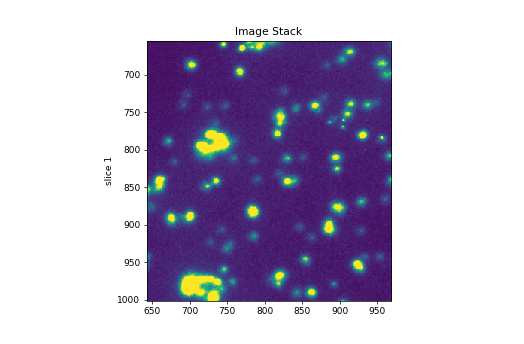

In [83]:
%matplotlib notebook
from __future__ import print_function
class stkshow(object):
    def __init__(self, X, min_thresh=1,max_thresh=99):
        self.fig, self.ax = plt.subplots(1,1)
        self.ax.set_title('Image Stack') # Title

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        self.vmin = np.percentile(self.X,min_thresh)
        self.vmax = np.percentile(self.X,max_thresh)
        self.im = self.ax.imshow(self.X[:, :, self.ind], vmin=self.vmin, vmax=self.vmax)
        self.fig.canvas.mpl_connect('scroll_event', self.onscroll)
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        plt.show()
stkshow(reg_test)

In [91]:
beads = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl','rb'))

In [94]:
tforms['good'][pos][h][0]

array([-1.00000040e+00, -3.99987219e+00,  5.34147625e-05])

<IPython.core.display.Javascript object>


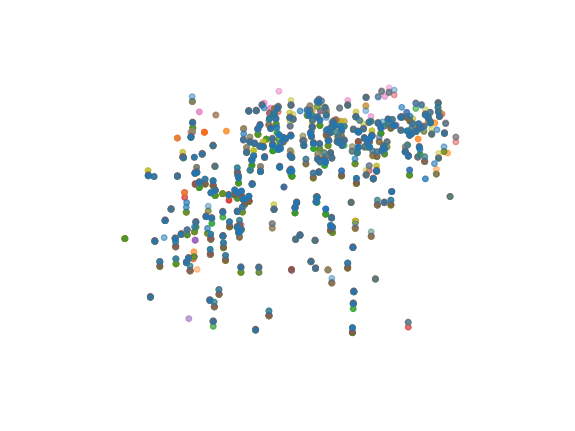

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pickle
beads = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/beads.pkl','rb'))
tforms = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Second_2018Aug24/Analysis/results/tforms.pkl','rb'))
from mpl_toolkits.mplot3d import axes3d, Axes3D
Pos = 'Pos0'
fig = plt.figure()
ax = Axes3D(fig)
for h in beads[Pos].keys():
    beads[Pos][h] = beads[Pos][h]+tforms['good'][Pos][h][0]
    X, Y, Z = beads[Pos][h][:,0], beads[Pos][h][:,1], beads[Pos][h][:,2]
    cset = ax.scatter(X, Y, Z)
    ax.clabel(cset, fontsize=9, inline=1)
# A = beads[Pos]['hybe1']
# X, Y, Z = A[:,0], A[:,1], A[:,2]
# cset = ax.scatter(X, Y, Z)
# ax.clabel(cset, fontsize=9, inline=1)
# B = beads[Pos]['hybe2'] + [ 3.07579842, -0.28712367, -1]
# X, Y, Z = B[:,0], B[:,1], B[:,2]
# cset = ax.scatter(X, Y, Z)
# ax.clabel(cset, fontsize=9, inline=1)

ax.grid(False)
plt.axis('off')
plt.show()

In [6]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' By Fred Cirera, after https://stackoverflow.com/a/1094933/1870254'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name,value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name,sizeof_fmt(size)))

                        Axes3D:   5.4KiB
                         beads:   4.6KiB
                            _i:   1.0KiB
                           _ii:   1.0KiB
                          _iii:   1.0KiB
                           _i2:   1.0KiB
                           _i3:   1.0KiB
                           _i4:   1.0KiB
                           _i5:   1.0KiB
                           _i1:   988.0B
